# Statistical modeling with statsmodel & patsy

- __Intro__
- __Intro to Patsy__
- __Linear regression__
- __Example datasets__
- __Discrete regression__
    - logistic regression
    - poisson model
- __Time series__

* use case: for a set of response variables (Y), and independent variables (X), find a model that explains the relations between X & Y.

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

In [2]:
import patsy

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
from scipy import stats

In [6]:
import seaborn as sns

### Using patsy

In [7]:
np.random.seed(123456789)

In [8]:
y  = np.array([ 1,  2,  3,  4,  5])
x1 = np.array([ 6,  7,  8,  9, 10])
x2 = np.array([11, 12, 13, 14, 15])

In [9]:
# linear model: Y = b0 + b1x1 + b2x2 + b3x1x2
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T; X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [11]:
# use NumPy least-square-fit func to find beta coefficient vector
beta, res, rank, sval = np.linalg.lstsq(X, y, rcond=None); beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -1.11022302e-15])

### Patsy syntax
* basic structure: "LHS ~ RHS" (LHS contains response vars; RHS contains independent vars)
* "+" & "-" signs in expressions are set union/difference ops, not math ops

In [19]:
# create a dictionary to map variable names to corresponding data arrays
data = {"y": y, "x1": x1, "x2": x2}

In [20]:
# define model
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [21]:
# y, X are DesignMatrix instances = subclass of NumPy arrays
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [22]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [23]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [27]:
# ordinary linear regression (OLS)
model = sm.OLS(y, X)

In [28]:
result = model.fit()
result.params

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -7.77156117e-16])

In [29]:
# using statsmodel API (imported as smf)
# pass Patsy model formula & data dictionary
model = smf.ols(
    "y ~ 1 + x1 + x2 + x1:x2", 
    df_data)

result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -7.771561e-16
dtype: float64

In [30]:
result.summary()

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.860e+27
Date:                Sun, 19 May 2019   Prob (F-statistic):           1.46e-28
Time:                        09:19:27   Log-Likelihood:                 151.41
No. Observations:                   5   AIC:                            -296.8
Df Residuals:                       2   BIC:                            -298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556   6.16e-14  -9.02e+12      0.000      -0.556      -0.556
x1             1.8889    2.3e-13   8.22e+12      0.000       1.889       1.889
x2            -0.8889   7.82e-14  -1.14e+13      0.000      -0.889      -0.889
x1:x2      -7.772e-16   7.22e-15     -0.108      0.924   -3.18e-14    3.03e-14
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.071
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.399
Skew:                           0.401   Prob(JB):                        0.819
Kurtosis:                       1.871   Cond. No.                     6.86e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
from collections import defaultdict

In [32]:
data = defaultdict(lambda: np.array([1,2,3]))

In [33]:
# intercept & a correspond to a constant and a linear dependence on a.
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [34]:
# now we have 2nd independent variable, "b"
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [35]:
# intercept can be removed
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [36]:
# auto expansion
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [37]:
# higher-order expansions
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [38]:
# removing specific term (in this case, a:b:c)
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

* "+" and "-" operators are used in Patsy for set-like operations (not math)
* Patsy also provides an identity function (I).

In [39]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [40]:
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [41]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [42]:
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [43]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [44]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [45]:
z = lambda x1, x2: x1+x2

In [46]:
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### Categorical variables
* When using categories in a linear model, we typically need to recode them with dummy variables.

In [47]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [48]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [49]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [50]:
# variables with non-numerical values are auto-interpreted & treated as category data.
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [51]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [52]:
# Category data encoding is binary by default.
# Encoding can be changed/extended.
# Example: encoding categories with orthogonal polynomials instead of treatment indicators
# using (C(a,Poly))

patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


### Example: Linear regression
* Basic workflow:
    - Create instance of model class
    - invoke fit method
    - print summary stats
    - post-process model fit results

In [53]:
np.random.seed(123456789)
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)

In [54]:
data = pd.DataFrame({"x1": x1, "x2": x2})

In [66]:
# true value: y = 1 + 2x1 + 3x2 + 4x12

def y_true(x1, x2):
    return 1 + 2*x1 + 3*x2 + 4*x1*x2

In [67]:
# store true value of y in y_true column of the DataFrame.
data["y_true"] = y_true(x1, x2)
data["y_true"][0:5]

0    -0.198823
1   -12.298805
2   -15.420705
3     2.313945
4    -1.282107
Name: y_true, dtype: float64

In [68]:
# add normal-distributed noise to true values
e = np.random.randn(N)
e[0:5]

array([-0.56463281,  0.56190437,  1.22155556, -1.08257084, -0.35554624])

In [69]:
data["y"] = data["y_true"] + e
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-0.763456
1,2.128398,-1.524772,-12.298805,-11.736900
2,1.841711,-1.939271,-15.420705,-14.199150
3,0.082382,0.345148,2.313945,1.231374
4,0.858964,-0.621523,-1.282107,-1.637653


In [70]:
# we have two explanatory values (x1,x2) and a response (y).
# start with linear model
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

In [72]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     29.19
Date:                Sun, 19 May 2019   Prob (F-statistic):           1.19e-10
Time:                        09:41:05   Log-Likelihood:                -269.97
No. Observations:                 100   AIC:                             545.9
Df Residuals:                      97   BIC:                             553.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0444      0.377      2.774      0.0

In [73]:
# r-squared: how does data fit model? (1.0 = perfect)
result.rsquared

0.3757287272091422

In [74]:
# to investigate whether assumption of normal-distributed errors is justified
# start with residuals
result.resid.head()

0    -2.903191
1   -10.665331
2   -11.573520
3    -0.930212
4    -1.809809
dtype: float64

In [75]:
# check for normality
z, p = stats.normaltest(result.fittedvalues.values)
p

0.690964627386556

In [76]:
# extract coefficients
result.params

Intercept    1.044399
x1           1.131253
x2           2.966821
dtype: float64

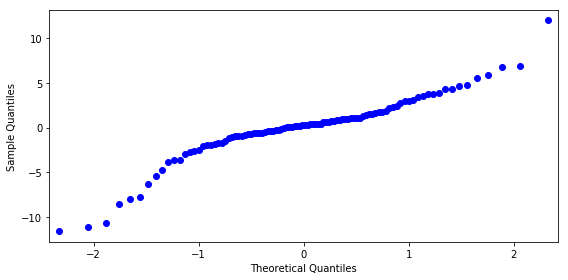

In [79]:
# QQ plot - compares sample quantiles with theoretical quantiles
# should be similar to a straight line if sampled values are normally distributed.
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
#fig.savefig("ch14-qqplot-model-1.pdf")

* Above significant deviation == unlikely to be a sample from normal distribution. We need to refine the model.
* Can add missing interaction to Patsy formula, then repeat.

In [80]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     614.3
Date:                Sun, 19 May 2019   Prob (F-statistic):           1.70e-62
Time:                        09:46:58   Log-Likelihood:                -143.25
No. Observations:                 100   AIC:                             294.5
Df Residuals:                      96   BIC:                             304.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9304      0.107      8.725      0.0

In [81]:
# r-squared stat: much better.
result.rsquared

0.9504900208668222

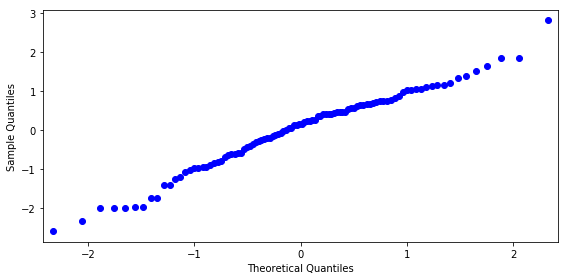

In [82]:
# repeat the QQ plot. (It's better.)
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)
fig.tight_layout()

In [83]:
result.params

Intercept    0.930429
x1           2.002468
x2           2.856701
x1:x2        3.868131
dtype: float64

* Predict values of new observations using __predict__.

In [84]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)

In [85]:
new_data = pd.DataFrame(
    {"x1": X1.ravel(), 
     "x2": X2.ravel()})

In [86]:
# predict y values
y_pred = result.predict(new_data)
y_pred.shape

(2500,)

In [88]:
# resize to square matrix for plotting purposes
y_pred = y_pred.values.reshape(50, 50)

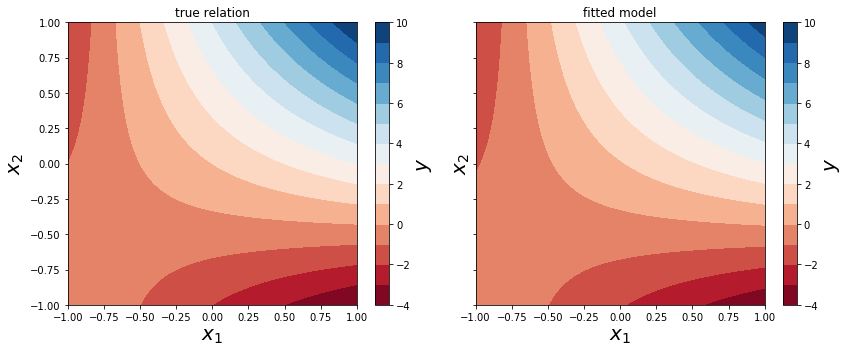

In [89]:
# do contour plots - true model vs fitted (100 noisy obs) model

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
#fig.savefig("ch14-comparison-model-true.pdf")

### Datasets from R

* Datasets sourced from http://vincentarelbundock.github.io/Rdatasets/datasets.html

In [90]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")
dataset.title

'Ice Cream Consumption'

In [91]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
cons      30 non-null float64
income    30 non-null int64
price     30 non-null float64
temp      30 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.0 KB


In [92]:
# ordinary least squares regression
model = smf.ols(
    "cons ~ -1 + price + temp", 
    data=dataset.data)
result = model.fit()

In [93]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sun, 19 May 2019   Prob (F-statistic):           9.03e-27
Time:                        09:52:26   Log-Likelihood:                 51.903
No. Observations:                  30   AIC:                            -99.81
Df Residuals:                      28   BIC:                            -97.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.7254      0.093      7.805      0.000       0.535       0.916
temp           0.0032      0.000      6.549      0.000       0.002       0.004
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.675
Skew:                           0.776   Prob(JB):                        0.159
Kurtosis:                       3.729   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

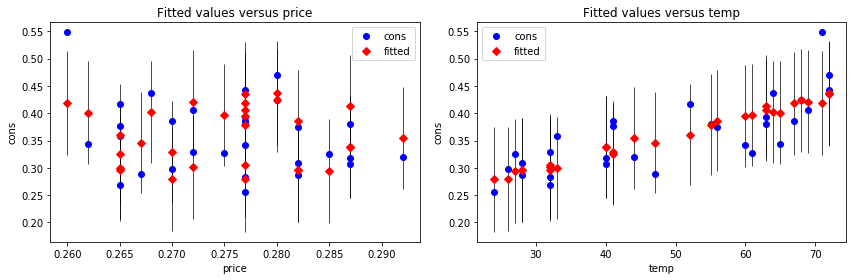

In [94]:
# maybe ice cream consumption = linear corr to temp, no relation to price?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

fig.tight_layout()
#fig.savefig("ch14-regressionplots.pdf")

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


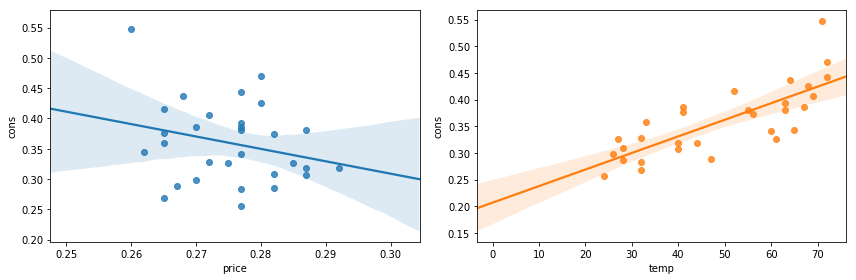

In [95]:
# sure looks that way

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot("price", "cons", dataset.data, ax=ax1);
sns.regplot("temp", "cons", dataset.data, ax=ax2);

fig.tight_layout()
#fig.savefig("ch14-regressionplots-seaborn.pdf")

### Discrete regression, logistic regression
* Requires different techniques, because linear regression requires a normally distributed continuous variable.
* statmodel discrete regression support: **Logit** (logistic regression), **Probit** (uses CMF of normal distribution, transforms linear predictor to [0,1], **MNLogit** (multinomial logistic regression), and **Poisson** classes.

In [116]:
# Iris dataset
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [117]:
# 3 unique species
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [118]:
# let's use versicolor & virginica species as basis for binary variable
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

In [119]:
# map two species names into binary
df_subset.Species = df_subset.Species.map(
    {"versicolor": 1, 
     "virginica": 0})

In [120]:
# clean up names so Python doesn't have problems (periods to underscores)
df_subset.rename(
    columns={
        "Sepal.Length": "Sepal_Length", 
        "Sepal.Width": "Sepal_Width",
        "Petal.Length": "Petal_Length", 
        "Petal.Width": "Petal_Width"}, inplace=True)

In [121]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [122]:
# use Patsy to create a logit model 
model = smf.logit(
    "Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", 
    data=df_subset)

In [123]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [124]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 May 2019   Pseudo R-squ.:                  0.9142
Time:                        10:06:06   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.6378     25.708      1.659      0.097      -7.748      93.024
Sepal_Length     2.4652      2.394      1.030      0.303      -2.228       7.158
Sepal_Width      6.6809      4.480      1.49

In [125]:
# get_margeff = returns info on marginal effects of each explanatory variable.
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Sepal_Length     0.0445      0.038      1.163      0.245      -0.031       0.120
Sepal_Width      0.1207      0.064      1.891      0.059      -0.004       0.246
Petal_Length    -0.1703      0.057     -2.965      0.003      -0.283      -0.058
Petal_Width     -0.3303      0.110     -2.998      0.003      -0.546      -0.114


In [127]:
# use fitted model to predict responses to new explanatory variable values.
# TODO

### Poisson distribution
* use case: response variable = #successes for many attempts - each with low probability of success.

In [169]:
# discoveries dataset
dataset = sm.datasets.get_rdataset("discoveries")

In [144]:
#dataset.data.head

df = dataset.data.set_index("time").rename(columns={"value" : "discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


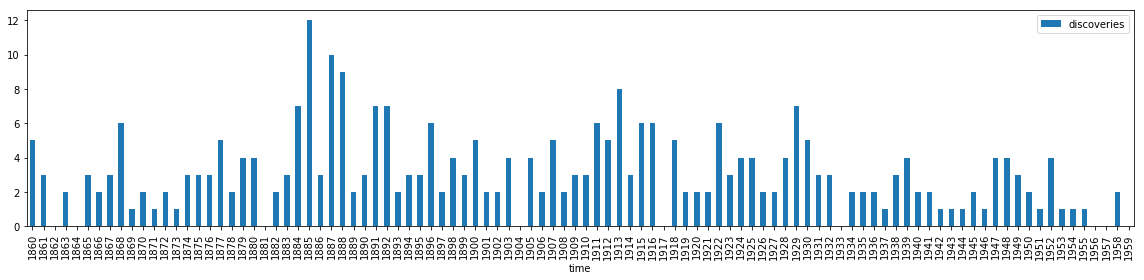

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
#fig.savefig("ch14-discoveries.pdf")

In [147]:
# attempt to fit to a poisson process
# patsy formula "discoveries ~ 1" == model discoveries variable with only intercept coeff.

model = smf.poisson("discoveries ~ 1", data=df)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Sun, 19 May 2019   Pseudo R-squ.:                   0.000
Time:                        10:19:48   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243
==============================================================================
"""

In [148]:
# lambda param of poisson distribution via exponential function
# use to compare histogram of observed counts vs theoretical results
lmbda = np.exp(result.params) 

In [149]:
X = stats.poisson(lmbda)

In [150]:
# confidence intervals
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [151]:
# create upper & lower confidence interval bounds
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

In [155]:
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)
#v, k = np.histogram(df.values, bins=12, range=(0, 12))

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


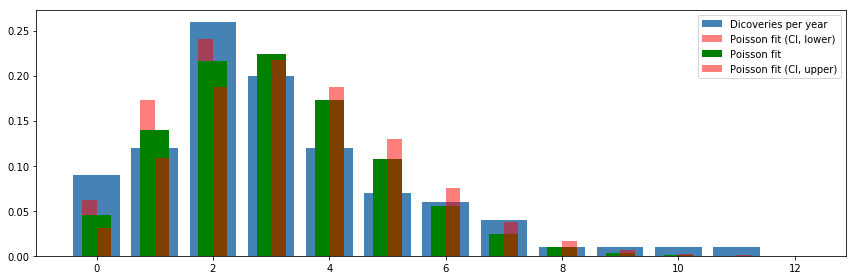

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(
    k[:-1], v, 
    color="steelblue",  align='center', 
    label='Dicoveries per year') 

ax.bar(
    k-0.125, X_ci_l.pmf(k), 
    color="red", alpha=0.5, align='center', width=0.25, 
    label='Poisson fit (CI, lower)')

ax.bar(
    k, X.pmf(k), 
    color="green",  align='center', width=0.5, 
    label='Poisson fit')

ax.bar(
    k+0.125, X_ci_u.pmf(k), 
    color="red",  alpha=0.5, align='center', width=0.25, 
    label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
#fig.savefig("ch14-discoveries-per-year.pdf")

# conclusion:
# dataset NOT well described by poisson process

### Time series
* Not same as regular regression - time series samples can't be regarded as independent random samples.
* example model type for time series = autoregressive (AR) model - future value depends on "p" earlier values. AR = special case of ARMA (autoregressive with moving average) model.

In [158]:
# outdoor temp dataset
df = pd.read_csv(
    "temperature_outdoor_2014.tsv", 
    header=None, 
    delimiter="\t", 
    names=["time", "temp"])

df.time = pd.to_datetime(df.time, unit="s")
df      = df.set_index("time").resample("H").mean()

In [159]:
# extract March & April data to new dataframes
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]

* Attempt to model temp observations using AR model.
* Important assumption: applied to "stationary process" (no autocorrelation or other trends other than those explained by model terms)

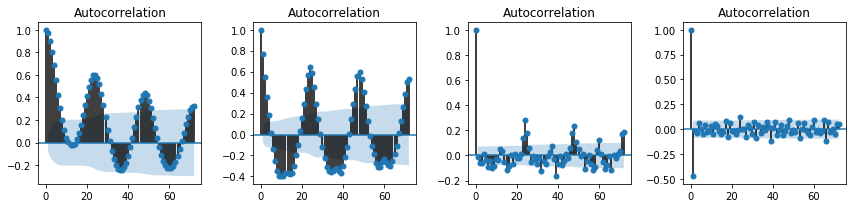

In [161]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

smg.tsa.plot_acf(df_march.temp,                               lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(),               lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(),        lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])

fig.tight_layout()
#fig.savefig("ch14-timeseries-autocorrelation.pdf")

# below: clear correlation between successive values in left-most time series
# also: decreasing correlation for increasing order.

In [162]:
# create AR model using March data
model = sm.tsa.AR(df_march.temp)

In [164]:
# set fit order to 72 hours
result = model.fit(72)

In [166]:
# Durbin-Watson statistical test - for stationary behavior in a time series
sm.stats.durbin_watson(result.resid)

1.9985623006352973

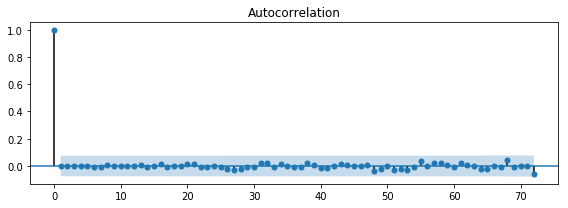

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)
fig.tight_layout()
#fig.savefig("ch14-timeseries-resid-acf.pdf")

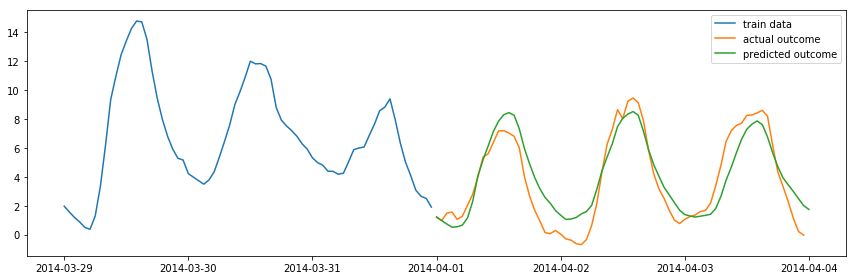

In [168]:
# plot forecast (red) vs prev 3 days actual (blue) vs actual outcome (green)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(
    df_march.index.values[-72:], 
    df_march.temp.values[-72:], 
    label="train data")

ax.plot(
    df_april.index.values[:72], 
    df_april.temp.values[:72], 
    label="actual outcome")

ax.plot(
    pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
    result.predict("2014-04-01", "2014-04-4"), 
    label="predicted outcome")

ax.legend()
fig.tight_layout()
#fig.savefig("ch14-timeseries-prediction.pdf")